In [5]:
import pandas as pd

In [6]:
# Загрузка датасета
file_path = 'data/lab3/heart.csv'
data = pd.read_csv(file_path)

# Показ первых строк и информации о датасете
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0   63    1   3     145   233    1        0       150     0      2.3    0   
 1   37    1   2     130   250    0        1       187     0      3.5    0   
 2   41    0   1     130   204    0        0       172     0      1.4    2   
 3   56    1   1     120   236    0        1       178     0      0.8    2   
 4   57    0   0     120   354    0        1       163     1      0.6    2   
 
    caa  thall  output  
 0    0      1       1  
 1    0      2       1  
 2    0      2       1  
 3    0      2       1  
 4    0      2       1  )

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['output'])
y = data['output']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Оценка точности на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8241758241758241

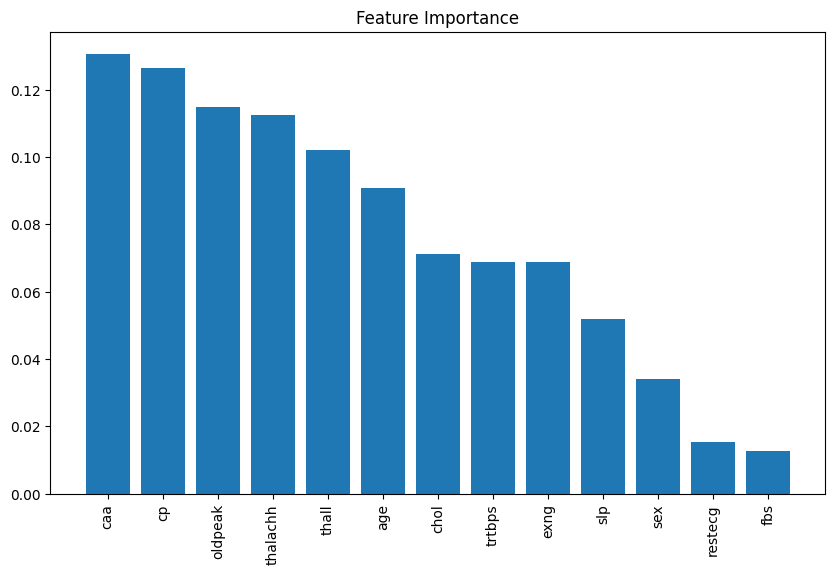

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Feature Importance график
feature_importances = model.feature_importances_
features = X.columns

# Построение графика
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(len(features)), feature_importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.title('Feature Importance')
plt.show()

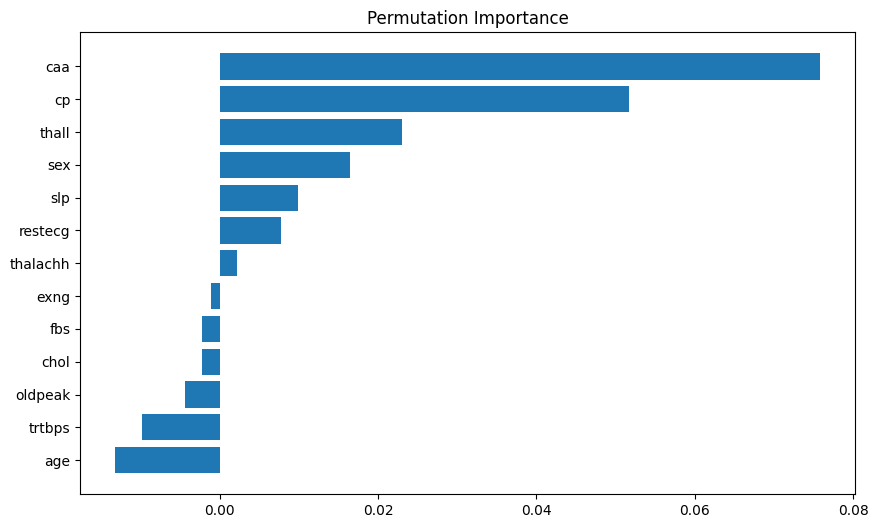

In [12]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title("Permutation Importance")
plt.show()

In [13]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)  # For positive class predictions

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.